<a href="https://colab.research.google.com/github/terencebeauj/Computer_Vision_Alien_VS_Predator/blob/master/AVP_Transfert_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Flatten, ReLU, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
cd drive/MyDrive/Colab_Notebooks/Persos/Computer_Vision/AVP/

/content/drive/MyDrive/Colab_Notebooks/Persos/Computer_Vision/AVP


In [ ]:
ls

AVP_Transfert_Learning.ipynb  CNN_AVP.ipynb  train/  validation/


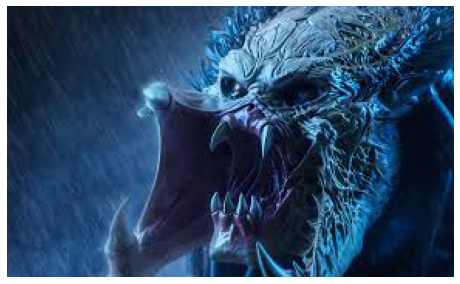

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(image.load_img("./train/predator/222.jpg"))
plt.axis("off")
plt.show();

In [ ]:
train_path = "./train"
test_path = "./validation"

In [ ]:
IMAGE_SIZE = [224, 224]
!ls

AVP_Transfert_Learning.ipynb  CNN_AVP.ipynb  train  validation


In [ ]:
image_files = glob(train_path + "/*/*.jpg")
valid_image_files = glob(test_path + "/*/*.jpg")

folders = glob(train_path + "/*")
folders

['./train/alien', './train/predator']

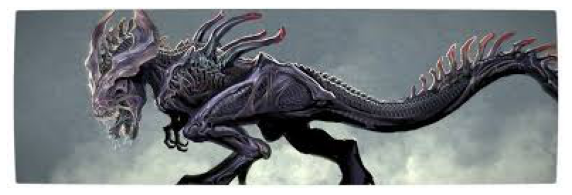

In [ ]:
plt.figure(figsize=(10,10))

plt.imshow(image.load_img(np.random.choice(image_files)))
plt.axis("off")
plt.show();

In [ ]:
ptm = VGG16(include_top=False,
            input_shape=IMAGE_SIZE+[3])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
ptm.trainable = False

In [ ]:
K = 1 # or len(folders) if we don't use the sigmoid
x = Flatten()(ptm.output)
x = Dense(512, activation=LeakyReLU())(x)
x = Dropout(0.2)(x)
x = Dense(256, activation=LeakyReLU())(x)
x = Dropout(0.2)(x)
x = Dense(128, activation=LeakyReLU())(x)
x = Dropout(0.2)(x)
x = Dense(64, activation=LeakyReLU())(x)
x = Dropout(0.2)(x)
X = Dense(1, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=ptm.input, outputs=X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
gen = ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.1,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         preprocessing_function=preprocess_input)

In [ ]:
batch_size = 32


train_generator = gen.flow_from_directory(train_path,
                                          shuffle=True,
                                          target_size=IMAGE_SIZE,
                                          batch_size=batch_size,
                                          class_mode="binary")


valid_generator = gen.flow_from_directory(test_path,
                                          target_size=IMAGE_SIZE,
                                          batch_size=batch_size,
                                          class_mode="binary")

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=SGD(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data=valid_generator,
                              epochs=20,
                              steps_per_epoch=int(np.ceil(len(image_files))/batch_size),
                              validation_steps=int(np.ceil(len(valid_image_files)/batch_size)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
21/21 [==============================] - 241s 10s/step - loss: 3.2747 - accuracy: 0.5811 - val_loss: 0.5241 - val_accuracy: 0.8050
Epoch 2/20
21/21 [==============================] - 11s 521ms/step - loss: 1.2618 - accuracy: 0.7582 - val_loss: 0.3507 - val_accuracy: 0.8950
Epoch 3/20
21/21 [==============================] - 11s 522ms/step - loss: 1.0072 - accuracy: 0.7984 - val_loss: 0.4254 - val_accuracy: 0.8700
Epoch 4/20
21/21 [==============================] - 11s 525ms/step - loss: 0.6512 - accuracy: 0.8459 - val_loss: 0.2692 - val_accuracy: 0.9000
Epoch 5/20
21/21 [==============================] - 11s 530ms/step - loss: 0.4676 - accuracy: 0.8812 - val_loss: 0.2923 - val_accuracy: 0.9000
Epoch 6/20
21/21 [==============================] - 11s 521ms/step - loss: 0.4486 - accuracy: 0.8842 - val_loss: 0.2526 - val_accuracy: 0.9150
Epoch 7/20
21/21 [==============================] - 11s 522ms/step - loss: 0.3630 - accuracy: 0.9034 - val_loss: 0.2510 - val_accuracy: 0.8900


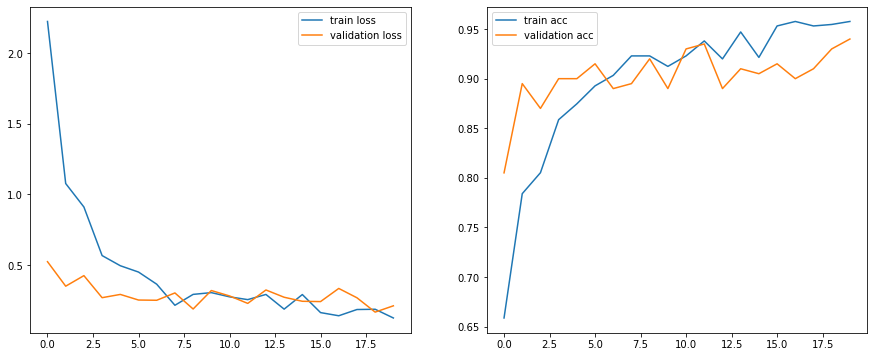

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="validation acc")
plt.legend()
plt.show();

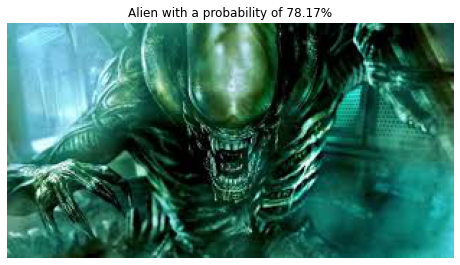

In [ ]:
valid_image_files = glob(test_path + "/*/*.jpg")
txt = np.random.choice(valid_image_files)
test_image = image.load_img(txt, target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = preprocess_input(test_image)

test_image = np.expand_dims(test_image, axis=0)

proba = np.round(100*model.predict(test_image)[0][0],2)
if proba < 50:
  decision = "Alien"
  proba = np.round(100-proba,2)
else:
  decision = "Predator"
  proba = np.round(proba, 2)

plt.figure(figsize=(8, 8))

img = mpimg.imread(txt)
plt.axis("off")
plt.title(f"{decision} with a probability of {proba}%")
plt.imshow(img);